## STAT 207 Lab 4: Sampling Distributions, Probability, and Data Cleaning - [25 total points] - Solutions

Due: Wednesday, February 24, 11:59pm CST

## <u>Case Study</u>: Household Income and Education Level in U.S. Counties
In this lab we will explore the statistical concepts that we've learned this week while also examining the **median household income (median_hh_income)**, the **median education level (median_edu)**, and the relationship between these variables in a **population** of 3142 U.S. counties.

## 1. <u>Preliminaries</u>
### Imports

In [6]:
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()                              # sets the default plotting style

### 1a. [0.5 pt] Read the county.csv into a dataframe, call it df, and display the first five rows.

In [7]:
df = pd.read_csv('county.csv')         #read the file
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671,54571,55504,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.7,55317,none
1,Baldwin County,Alabama,140415,182265,212628,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562,none
2,Barbour County,Alabama,29038,27457,25270,-6.22,27.2,68.0,11.1,5.9,no,hs_diploma,17891.73,33368,partial
3,Bibb County,Alabama,20826,22915,22668,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404,none
4,Blount County,Alabama,51024,57322,58013,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412,none


### 1b. [0.5pt] Display the shape of the dataframe.

In [8]:
print('Shape of the dataframe')
print(df.shape)

print('Number of rows in the dataframe')
print(df.shape[0])

print('Number of columns in the dataframe')
print(df.shape[1])

Shape of the dataframe
(3142, 15)
Number of rows in the dataframe
3142
Number of columns in the dataframe
15


### 1c. [4 pt] Data cleaning and data type checking
We plan to analyze the "median_hh_income" variable as well as the "median_edu" variable in this assignment. In order to ensure that our subsequent functions work appropriately on these variables, you should do the following.
1. Make sure you have identified any values that have been encoded in the csv to represent a missing value. 
2. Make sure that the values in your "median_hh_income" variable are interpreted as numerical values. If not, fix this using the methods we discussed in class.
3. Delete any rows in your dataframe that have missing values. Remember, some "missing values", in the way that they're currently encoded are not always detectable by Python.

#### Warning: If you don't do this step appropriately, you may have issues when you run other functions.

#### Hint: There are some missing values in this csv. You may need to get creative (beyond what we taught you in class, but still using functions you know) to figure out what they are.


In [31]:
df[df['median_edu']== 'data unavailable']
df[df['median_hh_income']== 'data unavailable'] # know the index number

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
92,Kusilvak Census Area,Alaska,7028,7459,8202,2.91,data unavailable,64.8,4.1,data unavailable,data unavailable,data unavailable,data unavailable,data unavailable,none
2417,Oglala Lakota County,South Dakota,12466,13586,14354,1.59,data unavailable,51.3,3.8,data unavailable,data unavailable,data unavailable,data unavailable,data unavailable,none


In [32]:
nan_value = ['data unavailable']
after_drop = pd.read_csv('county.csv', na_values = nan_value)
after_drop.isna().sum()       #setting all the data unavilable to NaN value, and count how many are there

name                   0
state                  0
pop2000                3
pop2010                0
pop2017                3
pop_change             3
poverty                2
homeownership          0
multi_unit             0
unemployment_rate      3
metro                  3
median_edu             2
per_capita_income      3
median_hh_income       2
smoking_ban          580
dtype: int64

In [33]:
after_drop = after_drop.dropna()

In [34]:
after_drop.isna().sum()      #check if there are any that wasn't dropped

name                 0
state                0
pop2000              0
pop2010              0
pop2017              0
pop_change           0
poverty              0
homeownership        0
multi_unit           0
unemployment_rate    0
metro                0
median_edu           0
per_capita_income    0
median_hh_income     0
smoking_ban          0
dtype: int64

In [35]:
##after_drop['median_hh_income'] = pd.to_numeric(after_drop['median_hh_income']) #change it to numerical value

In [36]:
after_drop["median_hh_income"].dtype

dtype('float64')

In [39]:
after_drop.shape

(2559, 15)

### 1d. [0.5 pt] How many rows with missing values did our original dataframe have?

In [40]:
print((3142-2559),"rows")

583 rows


## 2. <u>Population Analysis</u>

We will consider our dataframe (with any missing values dropped) as the population of US counties.

### 2.a. [0.5 pt] Calculate the population mean of the median household income.

In [41]:
mean = after_drop['median_hh_income'].mean()
mean

49050.69284876905

### 2.b. [0.5 pt] Calculate the population standard deviation of the median household income.

In [42]:
sd = after_drop['median_hh_income'].std()
sd

12943.83427788543

### 2.c. [1 pt] Plot the population distribution and describe the shape of the distribution (skew and modality).

Make sure you accurately label the x-axis!

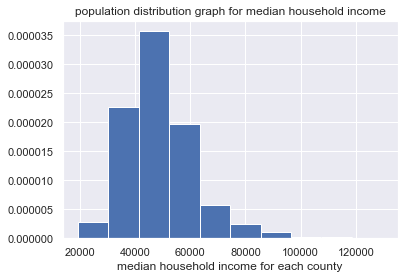

In [43]:
after_drop['median_hh_income'].hist(density= True)
plt.title('population distribution graph for median household income')
plt.xlabel('median household income for each county')
plt.show()

This graph is right skewed which would be explained both by it's visual and for it's mean is bigger than median. This is also a unimodal for it only has one peak

## 3. <u> Sample Analysis</u>

### 3.a. [0.5 pt] Collect a random sample from this population with replacement of size 200 using a random_state of 100. Display the first 5 rows.

In [44]:
random1 = after_drop.sample(200,replace = True, random_state = 100)
random1.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
1945,McDowell County,North Carolina,42151.0,44996,45159.0,0.20,19.3,72.6,7.0,4.15,no,hs_diploma,20661.07,38776.0,partial
2339,Greenwood County,South Carolina,66271.0,69661,70355.0,0.75,24.2,69.8,16.7,4.53,no,some_college,22452.40,39196.0,none
91,Valdez-Cordova Census Area,Alaska,10195.0,9636,9278.0,-5.06,7.4,71.8,17.6,7.96,no,some_college,30746.27,86019.0,none
2413,Perkins County,South Dakota,3363.0,2982,2974.0,-1.43,12.0,69.4,10.7,2.97,no,some_college,30826.61,50450.0,partial
403,Burke County,Georgia,22243.0,23316,22522.0,-1.34,29.2,71.7,10.5,7.08,yes,hs_diploma,18887.41,38707.0,none


### 3.b. [1 pt] Calculate the mean and standard deviation median household income of this sample.

In [45]:
mean1 = random1['median_hh_income'].mean()
mean1

49056.415

In [46]:
sd1 = random1['median_hh_income'].std()
sd1

13157.629103333147

### 3.c. [1 pt] Plot the sample distribution median household income and describe the shape of the distribution (skew and modality).

Make sure you accurately label the x-axis!

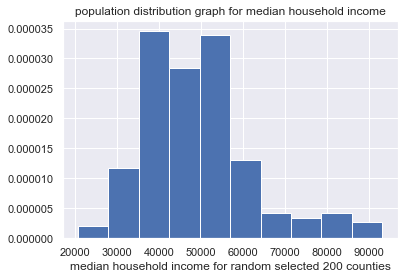

In [47]:
random1['median_hh_income'].hist(density= True)
plt.title('population distribution graph for median household income')
plt.xlabel('median household income for random selected 200 counties')
plt.show()

This graph is right skewed which would be explained both by it's visual and for it's mean is bigger than median. This is also a bimodal for it has two peaks

### 3.d. [2 pt] Create a sampling distribution of sample means (using the median household income variable) with the following specifications:
* the samples are of size 200
* the distribution is comprised of 5000 sample means.

In [48]:
SampleMean = []
for i in range(5000):
    r_s_m = after_drop['median_hh_income'].sample(200, replace = True).mean()
    SampleMean.append(r_s_m)
    

In [49]:
samplingDis = pd.DataFrame({'median_hh_income':SampleMean})
samplingDis

,median_hh_income
0,49250.895
1,48980.605
2,49715.475
3,50249.975
4,49830.820
...,...
4995,50469.270
4996,49298.920
4997,49605.275
4998,49187.020


### 3.e. [1 pt] Calculate the mean and standard deviation of this sampling distribution.

In [50]:
print(samplingDis['median_hh_income'].mean())

49024.642727999904


In [51]:
print(samplingDis['median_hh_income'].std())

905.8042753097517


### 3.f. [1 pt] Plot the sampling distribution and describe the shape (modality and skew).

#### Make sure you accurately label the x-axis.

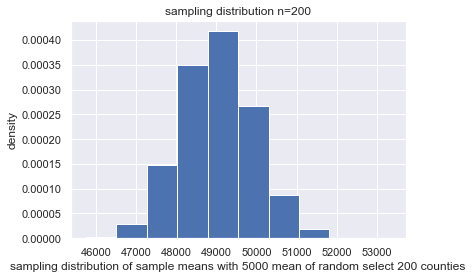

49009.5275


In [52]:
samplingDis['median_hh_income'].hist(density= True)
plt.title('sampling distribution n=200')
plt.xlabel('sampling distribution of sample means with 5000 mean of random select 200 counties')
plt.ylabel('density')
plt.show()
print(samplingDis['median_hh_income'].median())

This graph is symmetroc for both visulation and it's mean is roughly it's median. Also this graph is unimodalfor it only has one peak around the middle.

## 4.  <u>Comparing Population and Sampling Distributions</u>

### 4.a. [2 pt] If you randomly sampled a county from the population of counties (post-data cleaning) what would be the probability that this county has a median household income that was at least $52,000?

In [53]:
equal_or_above = after_drop[after_drop['median_hh_income'] >= 52000]
equal_or_above

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
25,Elmore County,Alabama,65874.0,79303,81677.0,1.39,13.5,77.6,7.0,3.64,yes,some_college,27266.03,54981.0,partial
41,Limestone County,Alabama,65676.0,82782,94402.0,6.19,14.8,77.1,9.4,3.98,yes,some_college,25685.40,52831.0,none
57,St. Clair County,Alabama,64742.0,83593,88199.0,2.52,13.7,82.2,5.5,3.97,yes,hs_diploma,24731.80,53483.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Sublette County,Wyoming,5920.0,10247,9799.0,-3.67,7.4,73.6,3.3,4.37,no,some_college,28810.97,84911.0,none
3137,Sweetwater County,Wyoming,37613.0,43806,43534.0,-3.57,12.0,73.7,14.6,4.55,no,some_college,30282.59,71083.0,none
3138,Teton County,Wyoming,18251.0,21294,23265.0,4.21,6.8,60.8,31.9,2.99,no,bachelors,48557.37,80049.0,partial
3139,Uinta County,Wyoming,19742.0,21118,20495.0,-2.22,14.9,73.7,17.0,4.50,no,some_college,27048.12,54672.0,none


In [54]:
total = after_drop.shape[0]
EorA = equal_or_above.shape[0]
prob = EorA/total
print('probability that this county has a median household income that was at least $52,000 is:', prob)

probability that this county has a median household income that was at least $52,000 is: 0.3395857756936303


### 4.b. [1 pt] If you randomly sampled a sample mean from the sampling distribution what would be the probability that sample mean was at least $52,000?

In [55]:
pos = samplingDis[samplingDis['median_hh_income'] >= 52000].shape[0] / samplingDis.shape[0] 
print('probability that sample mean was at least $52,000', pos)

probability that sample mean was at least $52,000 0.0006


## 5. <u>Probability</u>: 
The work we do here will help develop intuition for topics we will cover in next week's lectures. (You have everything you need to answer these questions though.)

### 5.a. [1 pt] Suppose we were to collect a random sample <u>with replacement</u> of six counties (from our post-data cleaning dataframe). What is the probability that the first and fifth sampled counties have a median income of at least $52,000 and the other four do not?

In [56]:
prob * ((1-prob)**3)*prob * (1-prob)

0.02193636461011993

### 5.b. [1 pt] What is the probability that the second and fourth sampled counties have a median income of at least $52,000 and the other four do not?

In [57]:
(1-prob)*prob*(1-prob)*prob*(1-prob)*(1-prob)

0.02193636461011993

### 5.c. [1 pt] Define the following events as follows.
* <u>event 1</u>: the sample that we collect has the second and fourth sampled counties have a median income of at least \$52,000 and the other four do not
* <u>event 2</u>: the SAME sample that we collect has the first and fifth sampled counties have a median income of at least $52,000 and the other four do not.

### Are event 1 and event 2 mutually exclusive? Why or why not?

yes they are, because the two event have the same sample and if the sample fits event 1 than it's first third fifth and sixth dample will be lower than 52000 which dors not the descrition of event 2 so they are mutually exclusive

### 5.d. [2 pt] How many possible ways(ie. orderings) can have exactly two of our six sampled counties have a median houeshold income of at least $52,000?

Hint: Event 1 and event 2 above are two ways (orderings) in which this can happen, there are several other ways.

Hint: How many possible ways can we choose two out of the six available positions within the sample (ie. position 1=county that was selected first, position 2=county that was selected second,...) to have a median household income over $52,000.

In [58]:
(6*5)/2

15.0

### 5.e. [1 pt] What is the probability that a randomly selected county from the population (post data-cleaning) will have a median educational attainment of 'bachelors'?

In [59]:
bachelors = after_drop[after_drop['median_edu'] == 'bachelors']


In [60]:
prob = bachelors.shape[0]/after_drop.shape[0]
prob

0.014458772958186792

### Tutorial: Filtering on Multiple Row Conditions in a Dataframe.

* We can use the "&" operator to write (condition 1) & (condition 2), in which condition 1 AND condition 2 must be met.
* We can use the "|" operator to write (condition 1) | (condition 2), in which condition 1 OR condition 2 must be met.

In [61]:
import pandas as pd
smalldf=pd.DataFrame({'year':['fresh','soph', 'soph', 'junior'], 'major': ['stats','cs','underwater_basket_weaving','cs']})
smalldf

,year,major
0,fresh,stats
1,soph,cs
2,soph,underwater_basket_weaving
3,junior,cs


In [62]:
smalldf[(smalldf['year']=='soph') & (smalldf['major']=='cs')]

,year,major
1,soph,cs


In [63]:
smalldf[(smalldf['year']=='soph') | (smalldf['major']=='cs')]

,year,major
1,soph,cs
2,soph,underwater_basket_weaving
3,junior,cs


### 5.f. [1 pt] What is the probability that if we randomly select a county from our population (post-data cleaning) that the county has a median household income of at least $52,000 and a median education attaintment of a bachelors degree?

In [64]:
probb = after_drop[(after_drop['median_edu'] == 'bachelors') & (after_drop['median_hh_income'] >= 52000)]
pprobb = probb.shape[0]/after_drop.shape[0]
pprobb

0.014458772958186792

### 5.g. [1 pt] Is the event of randomly selecting a county that has a median household income of at least $52,000 independent of the event of randomly selecting a county that has a median education attainment of a bachelor's degree? Why or why not?

yes, because the probability of randomly selecting a county that has a median education attainment of a bachelor's degree is given(condition A), when we know the probability of a county that has a median household income of at least $52,000(condition B).

In this question it fits P(A|B) = P(A) which the equation indicate the two event are independent to each other